# KNN CON VALIDACIÓN CRUZADA

### Docente: M.Sc. Richard Fernández 

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay #(antes plot_confusion_matrix)
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#from grid_search_utils import plot_grid_search, table_grid_search

In [2]:
data = pd.read_csv('D:/Bases/Kaggle/Social Network Ads/Social_Network_Ads.csv')

In [3]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
#data['Purchased'] = data.Purchased.astype(object)

In [6]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

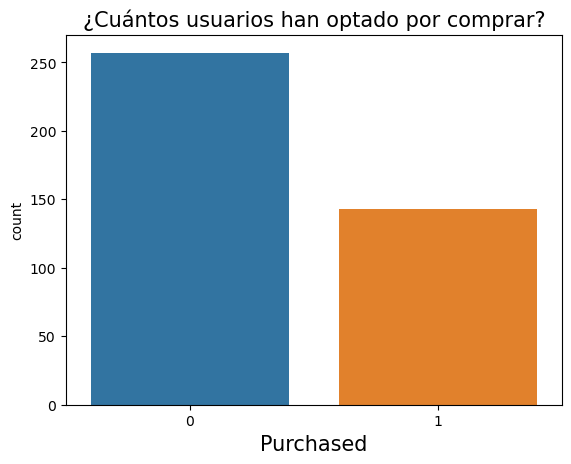

In [7]:
sns.countplot(data = data, x = 'Purchased')
plt.xlabel('Purchased', fontsize = 15)
plt.title('¿Cuántos usuarios han optado por comprar?', fontsize = 15)
plt.show()

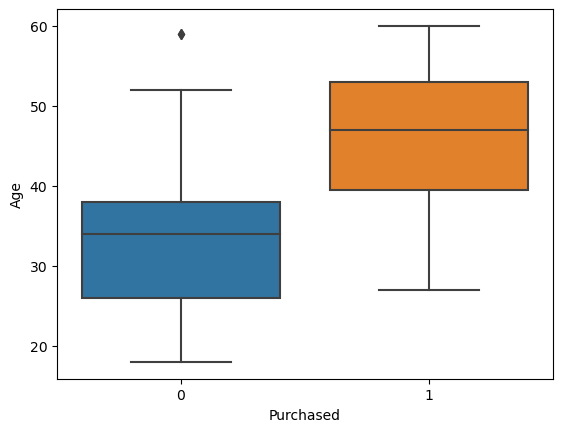

In [8]:
sns.boxplot(x='Purchased',y='Age',data=data)
plt.show()

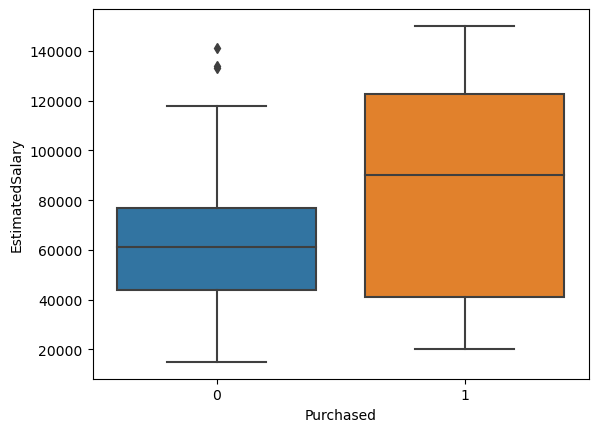

In [9]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data)
plt.show()

Gender     Female  Male
Purchased              
0             127   130
1              77    66


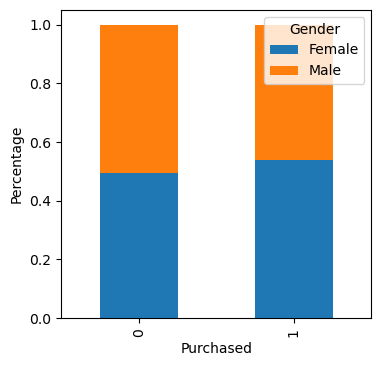

In [10]:
print(pd.crosstab(data["Purchased"],data["Gender"]))
Gender = pd.crosstab(data["Purchased"],data["Gender"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Purchased")
plt.ylabel("Percentage")
plt.show()

In [11]:
X = data.iloc[:,[2, 3]].values
y = data.iloc[:,-1].values

In [12]:
X[0:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [13]:
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [15]:
X_train[0:5]

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000]], dtype=int64)

In [16]:
X_test[0:5]

array([[   30, 87000],
       [   38, 50000],
       [   35, 75000],
       [   30, 79000],
       [   35, 50000]], dtype=int64)

In [17]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [18]:
X_train[0:5]

array([[ 1.92295008,  2.14601566],
       [ 2.02016082,  0.3787193 ],
       [-1.3822153 , -0.4324987 ],
       [-1.18779381, -1.01194013],
       [ 1.92295008, -0.92502392]])

In [19]:
X_test[0:5]

array([[-0.49618606,  0.56021375],
       [ 0.2389044 , -0.59133674],
       [-0.03675452,  0.18673792],
       [-0.49618606,  0.31122986],
       [-0.03675452, -0.59133674]])

### Modelado

In [28]:
#KNN
#classifier = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [21]:
#Validación Cruzada
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, cv=5)

In [22]:
#Accuracy
print(cv_scores)

[0.8125 0.8625 0.725  0.7625 0.675 ]


In [23]:
#Accuracy Promedio
print("cv_scores mean:{}".format(np.mean(cv_scores)))

cv_scores mean:0.7674999999999998


In [48]:
k_vecinos = list(range(1, 31))
print(k_vecinos)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [49]:
param_grid = {'n_neighbors':k_vecinos}

In [58]:
grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=3,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.844 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.828 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.812 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.875 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.953 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.812 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.797 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.828 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.875 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.938 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.859 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=3)

In [77]:
plot_grid_search(grid)

NameError: name 'plot_grid_search' is not defined

In [ ]:
table_grid_search(clf)

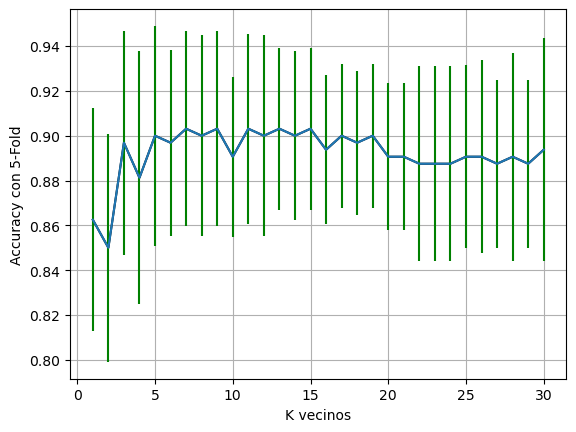

In [52]:
scores = np.array (grid.cv_results_['mean_test_score'])
stdvalues = np.array (grid.cv_results_['std_test_score'])
plt.plot (k_vecinos, scores, '-0')
plt.errorbar (k_vecinos, scores, yerr = stdvalues, ecolor = 'g')
plt.xlabel ('K vecinos')
plt.ylabel ('Accuracy con 5-Fold')
plt.grid ()
plt.show ()

In [59]:
print(grid.best_estimator_)

KNeighborsClassifier(n_neighbors=7)


In [31]:
classifier = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

In [24]:
#Tuning
#k_range = range(1, 31)
#k_scores = []

In [25]:
#for k in k_range:
#    knn = KNeighborsClassifier(n_neighbors=k)
#    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
#    k_scores.append(scores.mean())

In [32]:
#plt.plot(k_range, k_scores)
#plt.xlabel('Value of K for KNN')
#plt.ylabel('Cross-Validated Accuracy')
#plt.show()

In [33]:
#tune = pd.concat([pd.DataFrame(k_range),pd.DataFrame(k_scores)],axis=1)
#tune.columns = ['k_range', 'k_scores']
#tune

### Evaluación 

In [60]:
y_pred = classifier.predict(X_test)

In [61]:
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [62]:
y_test[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [63]:
confusion_matrix(y_test, y_pred)

array([[54,  4],
       [ 1, 21]], dtype=int64)

Confusion matrix, without normalization
[[54  4]
 [ 1 21]]
Normalized confusion matrix
[[0.93103448 0.06896552]
 [0.04545455 0.95454545]]


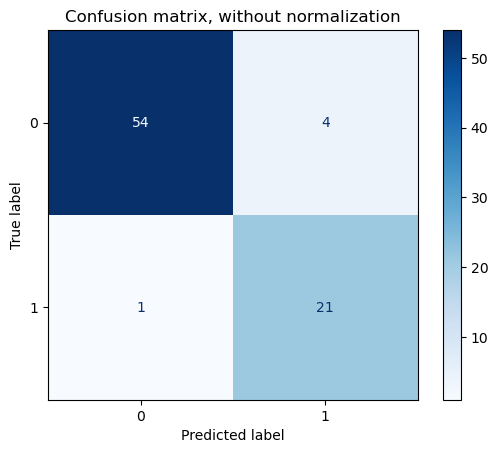

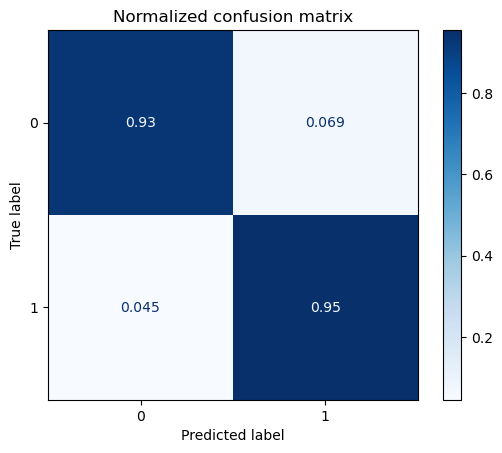

In [64]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [65]:
y_pred_prob = classifier.predict_proba(X_test)

In [66]:
y_pred_prob[0:5]

array([[0.57142857, 0.42857143],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [67]:
y_pred_prob[0:5,1]

array([0.42857143, 0.        , 0.28571429, 0.        , 0.        ])

In [68]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [69]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9592476489028213

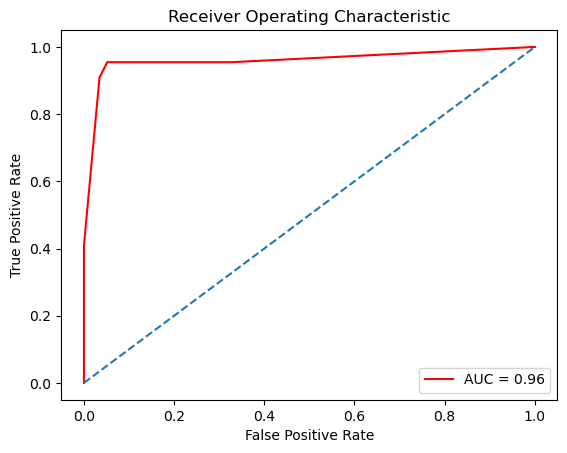

In [70]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
dataf = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [72]:
dataf.head(5)

,0,1,0,0,0,1
0,-0.496186,0.560214,0,0,0.571429,0.428571
1,0.238904,-0.591337,0,0,1.000000,0.000000
2,-0.036755,0.186738,0,0,0.714286,0.285714
3,-0.496186,0.311230,0,0,1.000000,0.000000
4,-0.036755,-0.591337,0,0,1.000000,0.000000


In [73]:
dataf.columns = ['Age', 'EstimatedSalary', 'Purchased', 'Purchased_Pred', 'Purchased_Pred_Prob_0', 'Purchased_Pred_Prob_1']

In [75]:
dataf.head(5)

,Age,EstimatedSalary,Purchased,Purchased_Pred,Purchased_Pred_Prob_0,Purchased_Pred_Prob_1
0,-0.496186,0.560214,0,0,0.571429,0.428571
1,0.238904,-0.591337,0,0,1.000000,0.000000
2,-0.036755,0.186738,0,0,0.714286,0.285714
3,-0.496186,0.311230,0,0,1.000000,0.000000
4,-0.036755,-0.591337,0,0,1.000000,0.000000


In [76]:
dataf.to_csv('D:/Bases/Kaggle/Social Network Ads/dataf.csv', index = False)

In [ ]:
#Tarea
#Comparar los modelos y presentar un cuadro resumen de la sensibilidad, ROC y GINI:
#1. Knn
#2. knn con smote
#3. knn con over
#4. knn con under